In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;# tool for data analysis and visualization in Python
import seaborn as sns;#high-level interface for creating attractive and informative statistical graphics

In [ ]:
df1 = pd.read_excel('Data.xlsx', sheet_name=0, header=0) #for reading the dataset1 which is customer
df2 = pd.read_excel('Data.xlsx', sheet_name=1, header=0)#for reading the dataset2  which is sales

# Print the first 5 rows of each DataFrame
print(df1.head())  # to represent the first few lines of the each table
print(df2.head())

       ID  Birth Year   Education Marital Status   Income  Kids Home  \
0  5524.0      1957.0  Graduation         Single  58138.0        0.0   
1  2174.0      1954.0  Graduation         Single  46344.0        1.0   
2  4141.0      1965.0  Graduation       Together  71613.0        0.0   
3  6182.0      1984.0  Graduation       Together  26646.0        1.0   
4  5324.0      1981.0         PhD        Married  58293.0        1.0   

   Teens Home Dt_Customer  Recency  
0         0.0  2012-09-04     58.0  
1         1.0  2014-03-08     38.0  
2         0.0  2013-08-21     26.0  
3         0.0  2014-02-10     26.0  
4         0.0  2014-01-19     94.0  
      ID  Num Own Website Purchases  Num Social Media Purchases  Amount
0   4619                         27                           0   21120
1   5255                         27                           0   21120
2  10311                         25                           0     640
3   6237                         23                      

In [ ]:
df1.info()   # to get the information about the tables like what is there datatype and how many elements are there in each of them etc.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2240 non-null   float64       
 1   Birth Year      2240 non-null   float64       
 2   Education       2240 non-null   object        
 3   Marital Status  2240 non-null   object        
 4   Income          2216 non-null   float64       
 5   Kids Home       2240 non-null   float64       
 6   Teens Home      2240 non-null   float64       
 7   Dt_Customer     2240 non-null   datetime64[ns]
 8   Recency         2241 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 157.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          

In [ ]:
df1.shape[0]  #how many row does the table1 countain

2242

In [ ]:
df2.shape[0]  #how many rows does the table2 countain

2240

To check how many null values are there

In [ ]:
df1.isnull().sum() /df1.shape[0]*100 #showing the missing values in percentage

ID                0.089206
Birth Year        0.089206
Education         0.089206
Marital Status    0.089206
Income            1.159679
Kids Home         0.089206
Teens Home        0.089206
Dt_Customer       0.089206
Recency           0.044603
dtype: float64

In [ ]:
df2.isnull().sum()/df2.shape[0]*100

ID                            0.0
Num Own Website Purchases     0.0
Num Social Media Purchases    0.0
Amount                        0.0
dtype: float64

In [ ]:
df1.dropna(inplace=True) # removed the null values

In [ ]:
df1.isnull().sum() /df1.shape[0]*100  #just checking whether the null values are removed or not

ID                0.0
Birth Year        0.0
Education         0.0
Marital Status    0.0
Income            0.0
Kids Home         0.0
Teens Home        0.0
Dt_Customer       0.0
Recency           0.0
dtype: float64

In [ ]:
df1['ID'] = df1['ID'].astype(int)                          #So there we are changing the datatype to the required datatype for the anlysis
df1['Birth Year'] = df1['Birth Year'].astype(int)
df1['Income'] = df1['Income'].astype(int)
df1['Kids Home'] = df1['Kids Home'].astype(int)
df1['Teens Home'] = df1['Teens Home'].astype(int)
df1['Recency'] = df1['Recency'].astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Birth Year      2216 non-null   int64         
 2   Education       2216 non-null   object        
 3   Marital Status  2216 non-null   object        
 4   Income          2216 non-null   int64         
 5   Kids Home       2216 non-null   int64         
 6   Teens Home      2216 non-null   int64         
 7   Dt_Customer     2216 non-null   datetime64[ns]
 8   Recency         2216 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 173.1+ KB


Now lets Meet the Objective of the Customer and know them more for a Better Sales rate



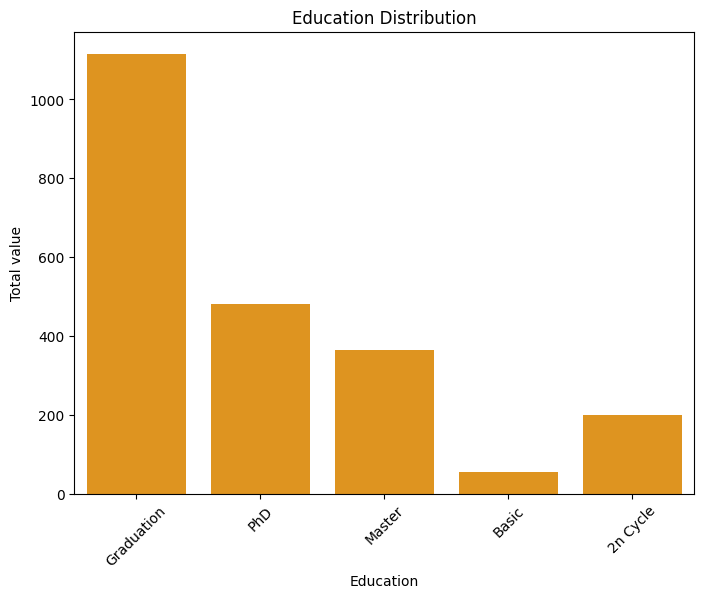

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Education', color='#fe9b00') #Here we are using the Countplot which describes the Over all Eduaction Distribution based on the total Value
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Total value')
plt.xticks(rotation=45)
plt.show()

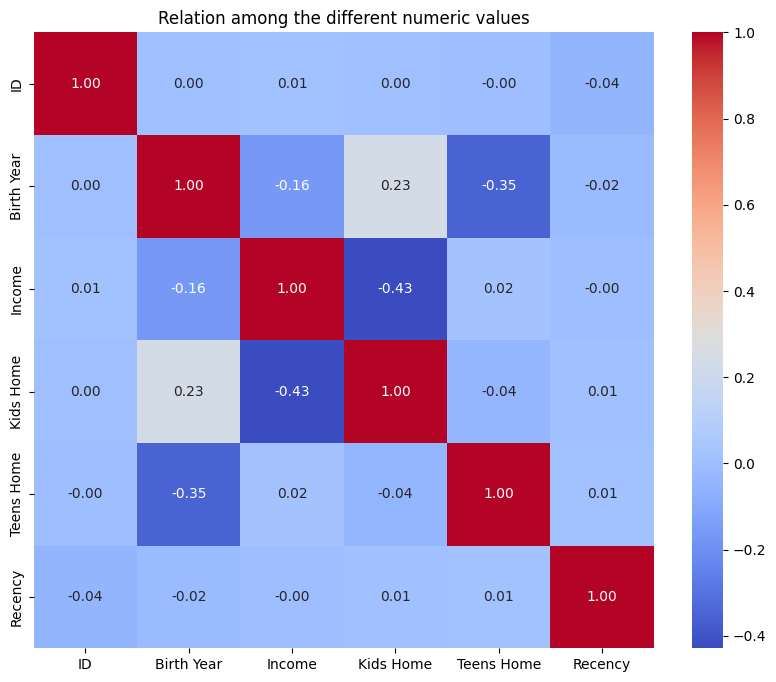

In [ ]:
numeric_df = df1.select_dtypes(include=['float64', 'int64']) #its used to select only the numerical datatype

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")# to calculate the correction of the data
plt.title('Relation among the different numeric values')
plt.show()

In [ ]:
import datetime
current_year = pd.Timestamp.now().year
df1['Age'] = current_year - df1['Birth Year']   # Calculate the age for each individual
df1['Age'] = df1['Age'].astype(int)
print(df1)

         ID  Birth Year   Education Marital Status  Income  Kids Home  \
0      5524        1957  Graduation         Single   58138          0   
1      2174        1954  Graduation         Single   46344          1   
2      4141        1965  Graduation       Together   71613          0   
3      6182        1984  Graduation       Together   26646          1   
4      5324        1981         PhD        Married   58293          1   
...     ...         ...         ...            ...     ...        ...   
2235  10870        1967  Graduation        Married   61223          0   
2236   4001        1946         PhD       Together   64014          2   
2237   7270        1981  Graduation       Divorced   56981          0   
2238   8235        1956      Master       Together   69245          0   
2239   9405        1954         PhD        Married   52869          1   

      Teens Home Dt_Customer  Recency  Age  
0              0  2012-09-04       58   67  
1              1  2014-03-08     

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Birth Year      2216 non-null   int64         
 2   Education       2216 non-null   object        
 3   Marital Status  2216 non-null   object        
 4   Income          2216 non-null   int64         
 5   Kids Home       2216 non-null   int64         
 6   Teens Home      2216 non-null   int64         
 7   Dt_Customer     2216 non-null   datetime64[ns]
 8   Recency         2216 non-null   int64         
 9   Age             2216 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 190.4+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2240 non-null   int64
 1   Num Own Website Purchases   2240 non-null   int64
 2   Num Social Media Purchases  2240 non-null   int64
 3   Amount                      2240 non-null   int64
dtypes: int64(4)
memory usage: 70.1 KB


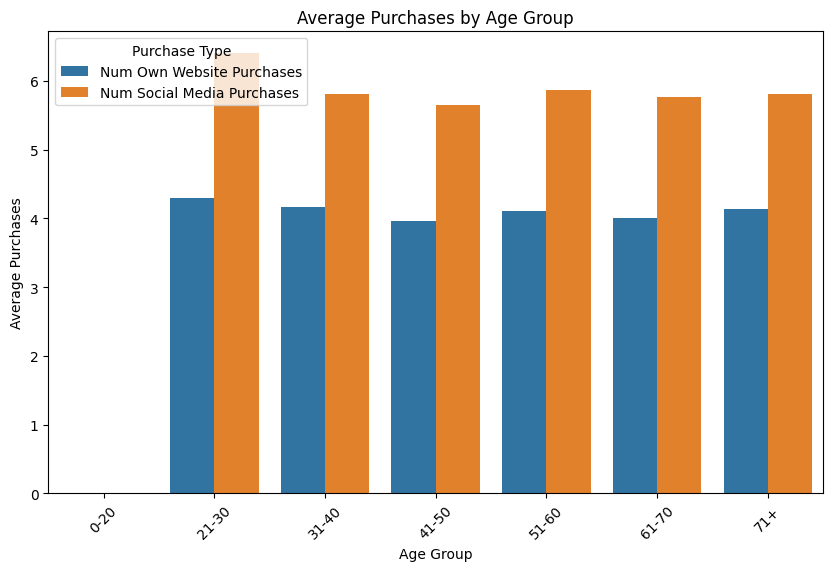

In [ ]:
merged_df = pd.concat([df1, df2[['Num Own Website Purchases', 'Num Social Media Purchases']]], axis=1)

# Define age groups (you can adjust these as needed)
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Define age bins
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']  # Define labels for age groups

# Segment the data into age groups
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

# Calculate the average number of own website purchases and social media purchases for each age group
avg_purchases_by_age = merged_df.groupby('Age Group')[['Num Own Website Purchases', 'Num Social Media Purchases']].mean().reset_index()

# Melt the DataFrame to plot both purchase types in the same graph
avg_purchases_by_age_melted = avg_purchases_by_age.melt(id_vars='Age Group', var_name='Purchase Type', value_name='Average Purchases')

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_purchases_by_age_melted, x='Age Group', y='Average Purchases', hue='Purchase Type')
plt.title('Average Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchases')
plt.legend(title='Purchase Type')
plt.xticks(rotation=45)
plt.show()

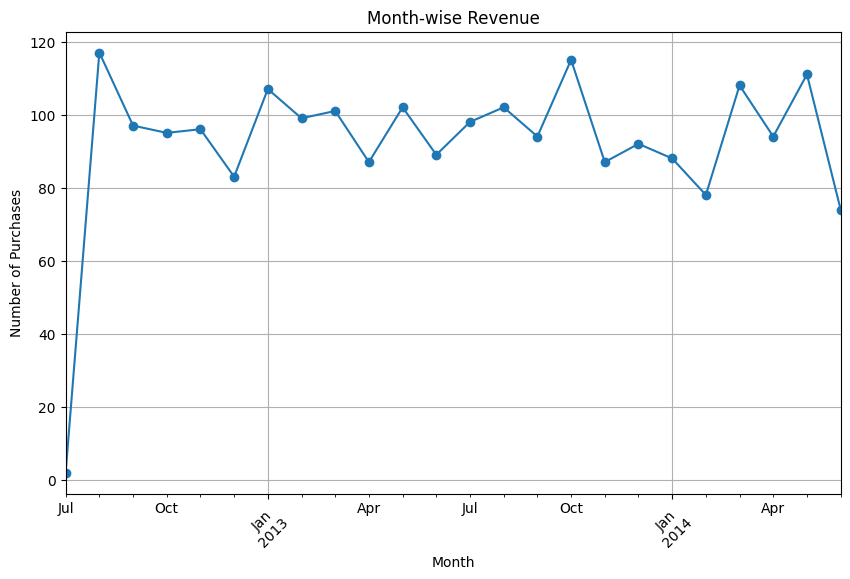

In [ ]:
all_dates = pd.concat([df1['Dt_Customer']]) #used to get concat all the dataframes into All_dates
all_dates_month = all_dates.dt.to_period('M')# Extract month from dates
month_counts = all_dates_month.value_counts().sort_index()# Count the occurrences of each month
plt.figure(figsize=(10, 6))
month_counts.plot(kind='line', marker='o')# Plot the line chart
plt.title('Month-wise Revenue')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

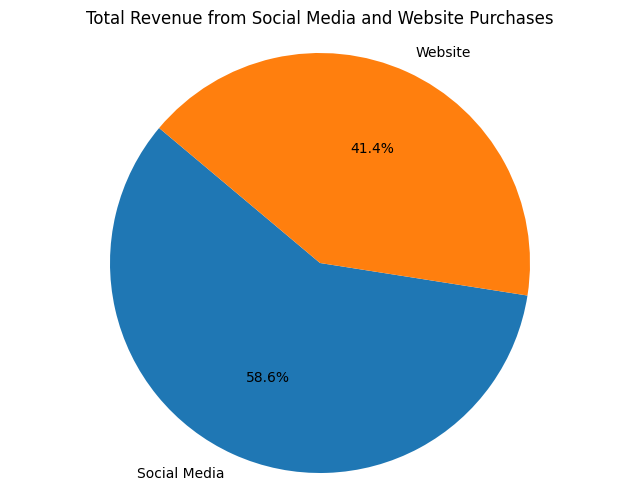

In [ ]:
total_social_media_revenue = df2['Num Social Media Purchases'].sum()
total_website_revenue = df2['Num Own Website Purchases'].sum()
labels = ['Social Media', 'Website'] # Create labels for the pie chart
values = [total_social_media_revenue, total_website_revenue]# Create values for the pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)# Create the pie chart
plt.title('Total Revenue from Social Media and Website Purchases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

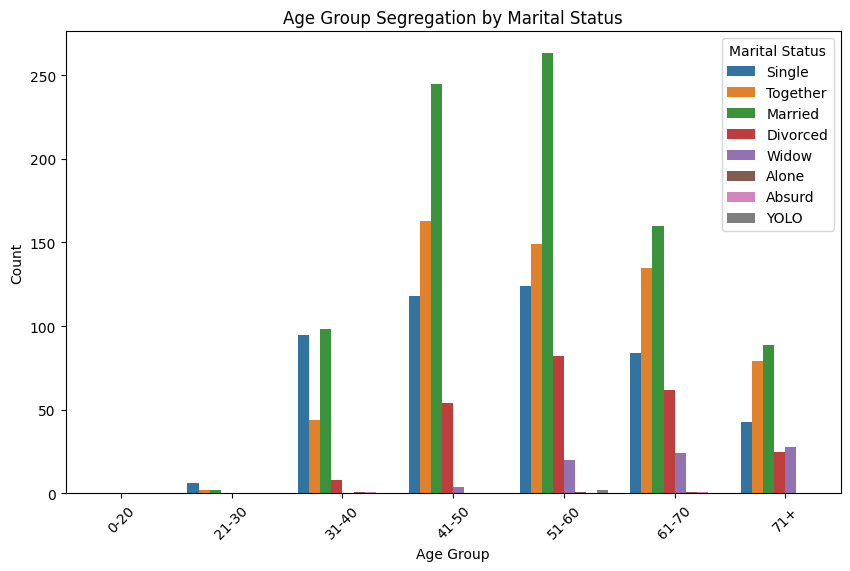

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]  # Define age bins
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']  # Define labels for age groups
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels)# Segment the data into age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Age Group', hue='Marital Status')# Now plot the countplot
plt.title('Age Group Segregation by Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

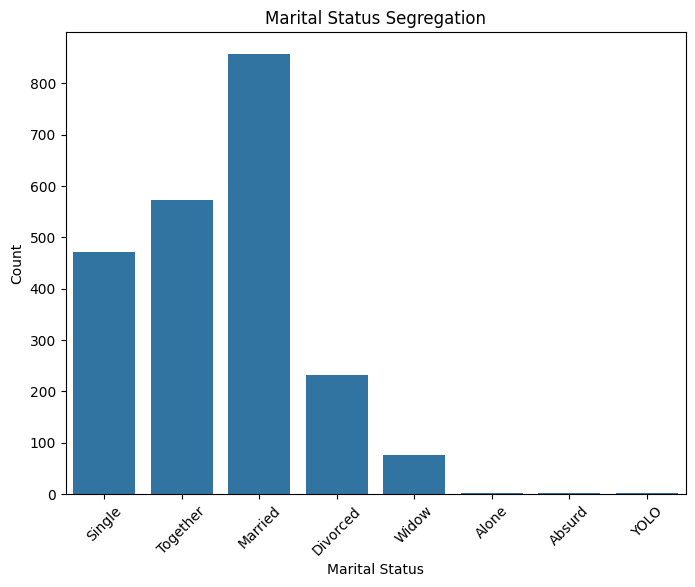

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Marital Status')#to calculate the Marital Status based on the count
plt.title('Marital Status Segregation')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

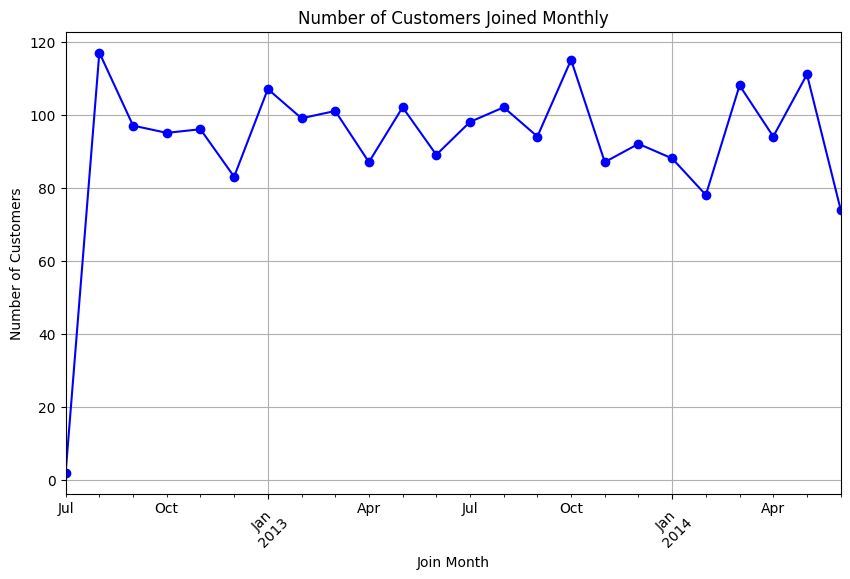

In [ ]:
df1['Join Month'] = df1['Dt_Customer'].dt.to_period('M')
monthly_customers = df1.groupby('Join Month').size()# Group the data by join month and count the number of customers
plt.figure(figsize=(10, 6))
monthly_customers.plot(kind='line', marker='o', color='b')
plt.title('Number of Customers Joined Monthly')
plt.xlabel('Join Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2216 non-null   int64         
 1   Birth Year      2216 non-null   int64         
 2   Education       2216 non-null   object        
 3   Marital Status  2216 non-null   object        
 4   Income          2216 non-null   int64         
 5   Kids Home       2216 non-null   int64         
 6   Teens Home      2216 non-null   int64         
 7   Dt_Customer     2216 non-null   datetime64[ns]
 8   Recency         2216 non-null   int64         
 9   Age             2216 non-null   int64         
 10  Age Group       2213 non-null   category      
 11  Join Month      2216 non-null   period[M]     
dtypes: category(1), datetime64[ns](1), int64(7), object(2), period[M](1)
memory usage: 274.8+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2240 non-null   int64
 1   Num Own Website Purchases   2240 non-null   int64
 2   Num Social Media Purchases  2240 non-null   int64
 3   Amount                      2240 non-null   int64
dtypes: int64(4)
memory usage: 70.1 KB


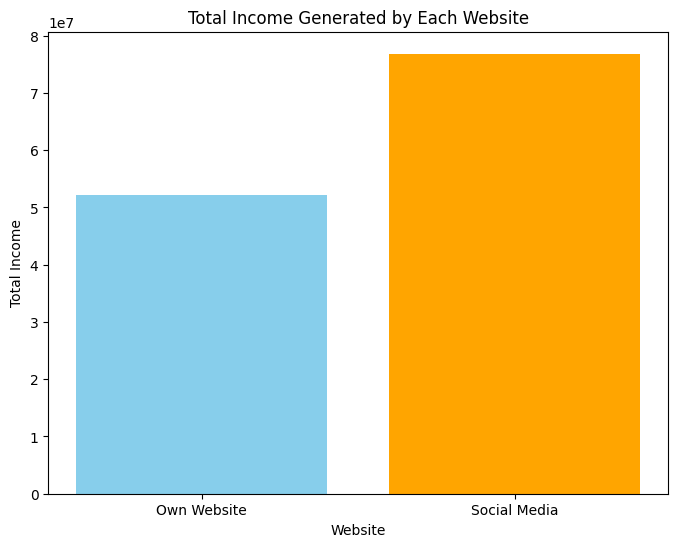

In [ ]:
total_income_own_website = df2['Num Own Website Purchases'] * df2['Amount']# Calculate total income generated from social media purchases
total_income_social_media = df2['Num Social Media Purchases'] * df2['Amount']
total_income = total_income_own_website.sum() + total_income_social_media.sum()# Calculate total income from both sources

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Own Website', 'Social Media'], [total_income_own_website.sum(), total_income_social_media.sum()], color=['skyblue', 'orange'])
plt.title('Total Income Generated by Each Website')
plt.xlabel('Website')
plt.ylabel('Total Income')
plt.show()

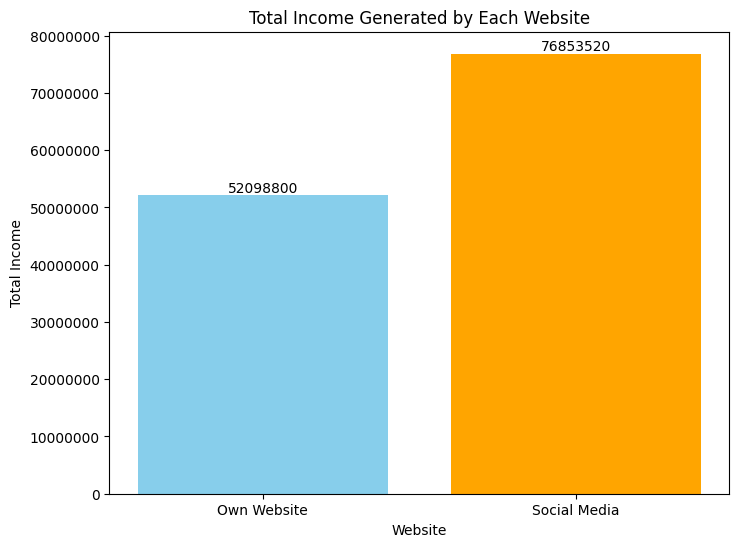

In [ ]:
from matplotlib.ticker import FormatStrFormatter

# Calculate total income (assuming it's in USD)
total_income = total_income_own_website.sum() + total_income_social_media.sum()

# Plotting the bar chart with custom formatting
plt.figure(figsize=(8, 6))
bars = plt.bar(['Own Website', 'Social Media'], [total_income_own_website.sum(), total_income_social_media.sum()], color=['skyblue', 'orange'])

# Set custom format to display ticks in thousands (modify '%.0f' for other formats)
formatter = FormatStrFormatter('%.0f')  # K for thousands (change for other units)
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels on top of each bar with formatted values
plt.bar_label(bars, [f"{formatter(value)}" for value in [total_income_own_website.sum(), total_income_social_media.sum()]])

plt.title('Total Income Generated by Each Website')
plt.xlabel('Website')
plt.ylabel('Total Income')
plt.show()




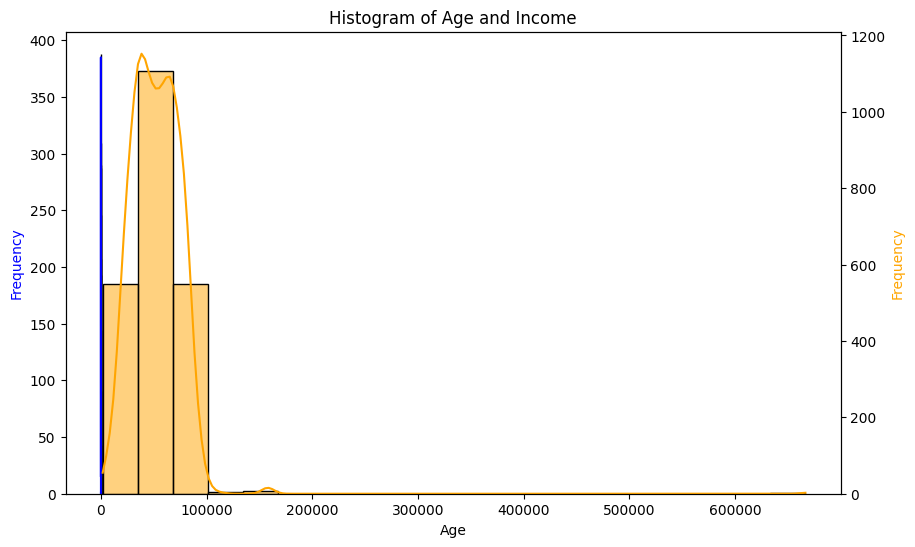

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting histograms for Age and Income
sns.histplot(df1['Age'], bins=20, kde=True, color='blue', alpha=0.5, ax=ax)
ax2 = ax.twinx()  # Create a second y-axis sharing the same x-axis
sns.histplot(df1['Income'], bins=20, kde=True, color='orange', alpha=0.5, ax=ax2)

# Set labels and titles
ax.set_xlabel('Age')
ax.set_ylabel('Frequency', color='blue')
ax2.set_ylabel('Frequency', color='orange')
plt.title('Histogram of Age and Income')

# Show plot
plt.show()

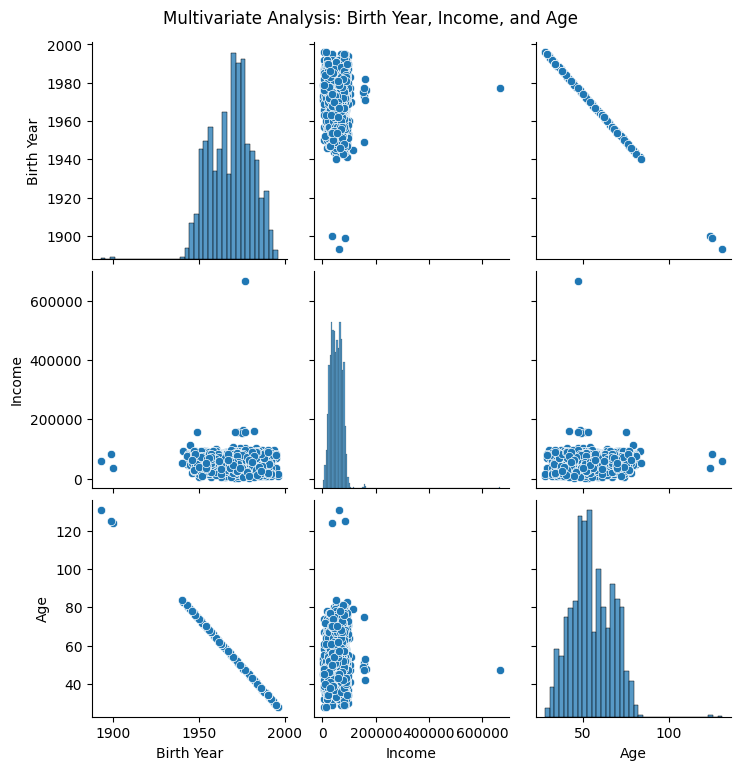

In [ ]:
sns.pairplot(df1[['Birth Year', 'Income', 'Age']])
plt.suptitle('Multivariate Analysis: Birth Year, Income, and Age', y=1.02)
plt.show()

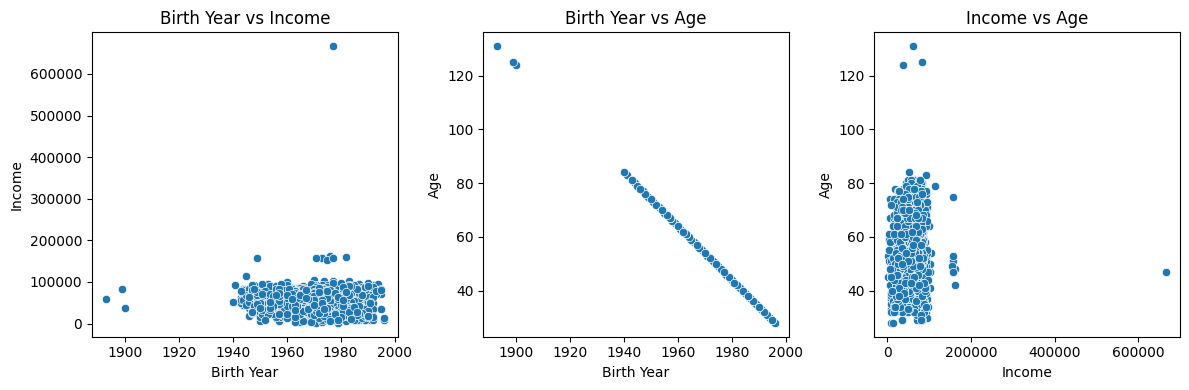

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='Birth Year', y='Income')
plt.title('Birth Year vs Income')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='Birth Year', y='Age')
plt.title('Birth Year vs Age')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='Income', y='Age')
plt.title('Income vs Age')

plt.tight_layout()
plt.show()
